# Introdução


Este notebook é a resolução do problemas propostos no [arquivo](Programa_3.pdf), onde serão utilizados 2 métodos, o da Secante e o de Muller para encontrar as raízes do polinômio proposto e comparar o desempenho dos dois métodos em termos de quantidade de iterações para encontrar as raízes com erro relativo menor que 0.1%.

Segue link do [repositório no github](https://github.com/igorsbs/metodos_numericos/tree/main)

## Bibliotecas necessárias para rodar o programa

In [ ]:
import numpy as np                  # Para lidar com listas e vetores de números e terr acesso a funçõeos trancendedntais básicas
import matplotlib.pyplot as plt     # Para fazer os gráficos 

## Polinômio

In [1]:
def poly(x):
    return (x-1)*(x-3)*(x-5)*(x-7)*(x-9)

### Visão gráfica da função, entre x = 0 a x = 10

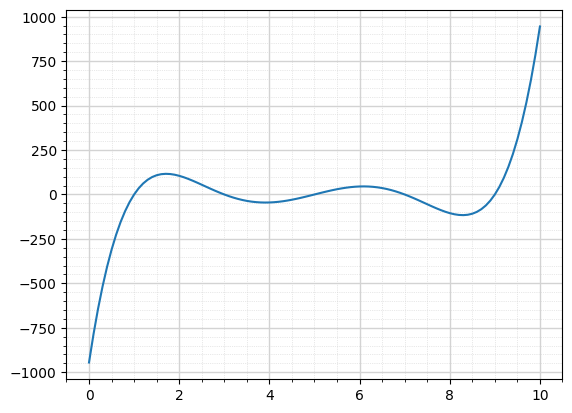

In [85]:
x_array = np.arange(0, 10.1, 0.1)
grid_x_ticks = np.arange(0, 11, 2)

plt.figure()
plt.plot(x_array,[poly(x) for x in x_array])
plt.xticks(grid_x_ticks)
plt.grid(which='major', linestyle='-', linewidth=1, color='lightgray')
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='lightgray')
plt.minorticks_on()
plt.show()

## Definição do método de Muller

In [89]:
def muller_method(func, x_init_0, x_init_1, x_init_2, tol):
    """
    Método de Müller para encontrar a raiz de uma função.

    Parâmetros:
    - func: função a ser analisada
    - x_init_0: primeira aproximação inicial da raiz
    - x_init_1: segunda aproximação inicial da raiz
    - x_init_2: terceira aproximação inicial da raiz
    - tol: tolerância para o erro relativo percentual

    Retorna:
    - xr: valor final da raiz aproximada
    - Err_rel: lista de erros relativos percentuais por iteração
    """
    
    x_0 = x_init_0
    x_1 = x_init_1
    x_2 = x_init_2

    Err_rel = [100]  # Erro inicial fictício para entrar no loop
    i = 0  # Contador de iterações

    while abs(Err_rel[i]) > tol:
        # Cálculo das diferenças entre os pontos
        h_0 = x_1 - x_0
        h_1 = x_2 - x_1

        # Diferenças divididas (derivadas aproximadas)
        delta_0 = (func(x_1) - func(x_0)) / h_0
        delta_1 = (func(x_2) - func(x_1)) / h_1

        # Coeficientes do polinômio interpolador de 2º grau
        a = (delta_1 - delta_0) / (h_1 + h_0)
        b = a * h_1 + delta_1
        c = func(x_2)

        # Cálculo da próxima aproximação usando a fórmula de Müller
        x_next = x_2 - 2 * c / (b + (b**2 - 4 * a * c)**0.5)

        # Cálculo do erro relativo percentual
        Err_rel.append((x_next - x_2) / x_next * 100)

        # Atualização dos pontos para a próxima iteração
        x_0 = x_1
        x_1 = x_2
        x_2 = x_next

        i += 1  # Incremento do contador de iteração

    xr = x_next  # Aproximação final da raiz

    return xr, Err_rel


## Definição do método da secante

In [90]:
def sec_method(func, x_0, x_1, tol):
    """
    Método da secante para encontrar a raiz de uma função.

    Parâmetros:
    - func: função a ser analisada
    - x_0: primeira aproximação inicial da raiz
    - x_1: segunda aproximação inicial da raiz
    - tol: tolerância para o erro relativo percentual

    Retorna:
    - xr: valor final da raiz aproximada
    - Err_rel: lista de erros relativos percentuais por iteração
    """
    
    x_prior = x_0     # x(n-1)
    x_actual = x_1    # x(n)

    Err_rel = [100]   # Erro inicial fictício para iniciar o loop
    i = 0             # Contador de iterações

    while abs(Err_rel[i]) > tol:
        # Cálculo da próxima aproximação com a fórmula da secante
        x_next = x_actual - (func(x_actual) * (x_prior - x_actual)) / (func(x_prior) - func(x_actual))

        # Cálculo do erro relativo percentual
        Err_rel.append((x_next - x_actual) / x_next * 100)

        # Atualização dos valores para a próxima iteração
        x_prior = x_actual
        x_actual = x_next

        i += 1  # Incremento do contador de iteração

    xr = x_next  # Aproximação final da raiz

    return xr, Err_rel

## Aplicação dos métodos

A aplicaçãoo dos métodos será feita com dois conjuntos de chutes iniciais diferentes para avaliar o desempenho dos métodos em cenários difererntes. É importante citar que o método de Muller necessita de 3 chutes iniciais e o método da Secante precisa de 2 chutes iniciais, para fim de comparação foi assumida a premissa que dois chutes iniciais seriam iguais para o metodo da Secante e de Muller, e para o caso de Muller, tem um chute inicial a mais que difere dos aplicados para o método da Secante

### Primeiro conjunto de chutes iniciais

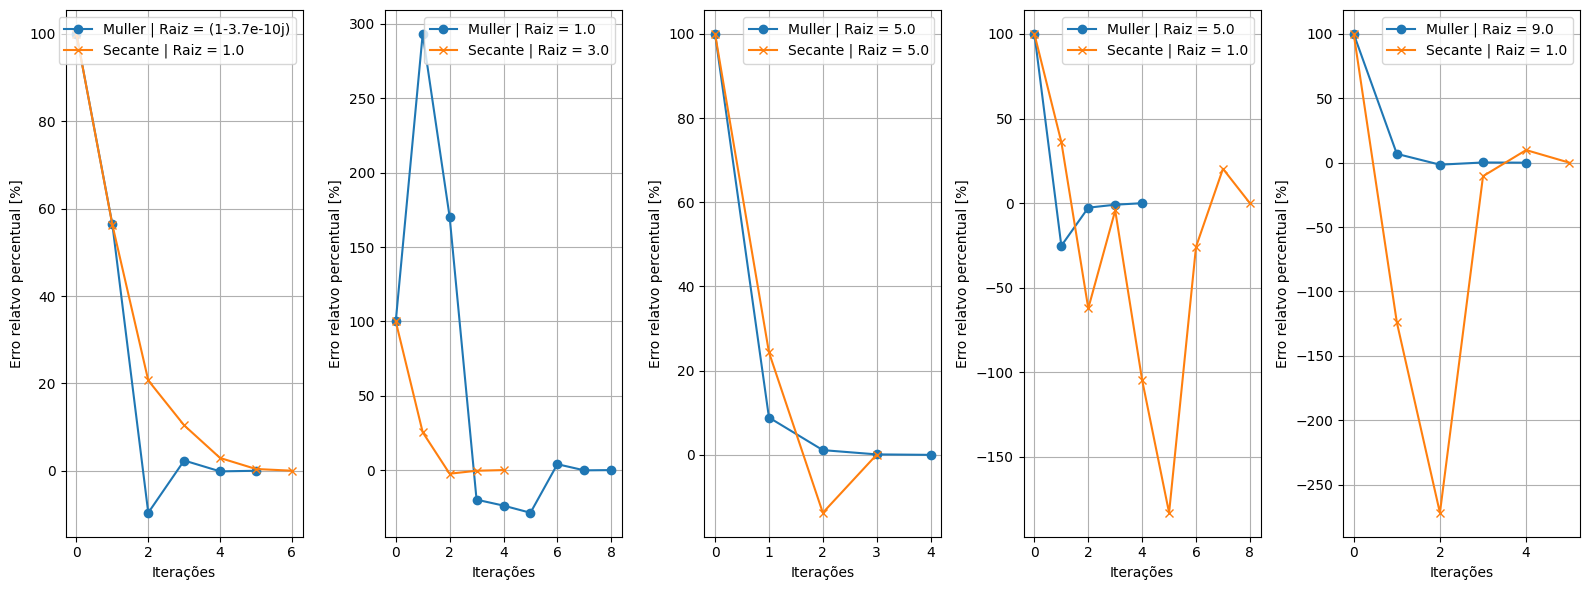

In [ ]:
# Dicionário com os valores iniciais para encontrar diferentes raízes
# Cada chave representa uma raiz esperada e os valores são as aproximações iniciais
initial_values = {
    'raiz_1': [0.1, 0.3, 0.5],
    'raiz_2': [2.1, 2.3, 2.5],
    'raiz_3': [4.1, 4.3, 4.5],
    'raiz_4': [6.1, 6.3, 6.5],
    'raiz_5': [8.1, 8.3, 8.5],
}

# Definição da tolerância para o critério de parada dos métodos
tol = 0.1

i = 1  # Índice para controle das subplots

# Criação da figura para plotar os gráficos de erro relativo
plt.figure(figsize=(16,6))

# Loop sobre cada conjunto de aproximações iniciais
for key, value in initial_values.items():
    
    # Aplicação do método de Müller com três aproximações iniciais
    xr_muller, Err_rel_muller = muller_method(poly, value[0], value[1], value[2], tol)
    
    # Aplicação do método da Secante com duas aproximações iniciais
    xr_sec, Err_rel_sec = sec_method(poly, value[0], value[1], tol)
    
    # Criação de uma subplot para a raiz atual
    plt.subplot(1, 5, i)
    
    # Plotagem do erro relativo por iteração para o método de Müller
    plt.plot(range(len(Err_rel_muller)), Err_rel_muller, marker='o', 
             label=f'Muller | Raiz = {xr_muller:.2f}')
    
    # Plotagem do erro relativo por iteração para o método da Secante
    plt.plot(range(len(Err_rel_sec)), Err_rel_sec, marker='x', 
             label=f'Secante | Raiz = {xr_sec:.2f}')
    
    # Configurações do gráfico: legenda, grade e rótulos
    plt.legend(loc='upper right')
    plt.grid()
    plt.xlabel('Iterações')
    plt.ylabel('Erro relativo percentual [%]')
    
    i += 1  # Avança para a próxima subplot

# Ajuste automático dos espaçamentos entre os subplots
plt.tight_layout()

# Exibição dos gráficos
plt.show()

### Segundo conjunto de chutes iniciais

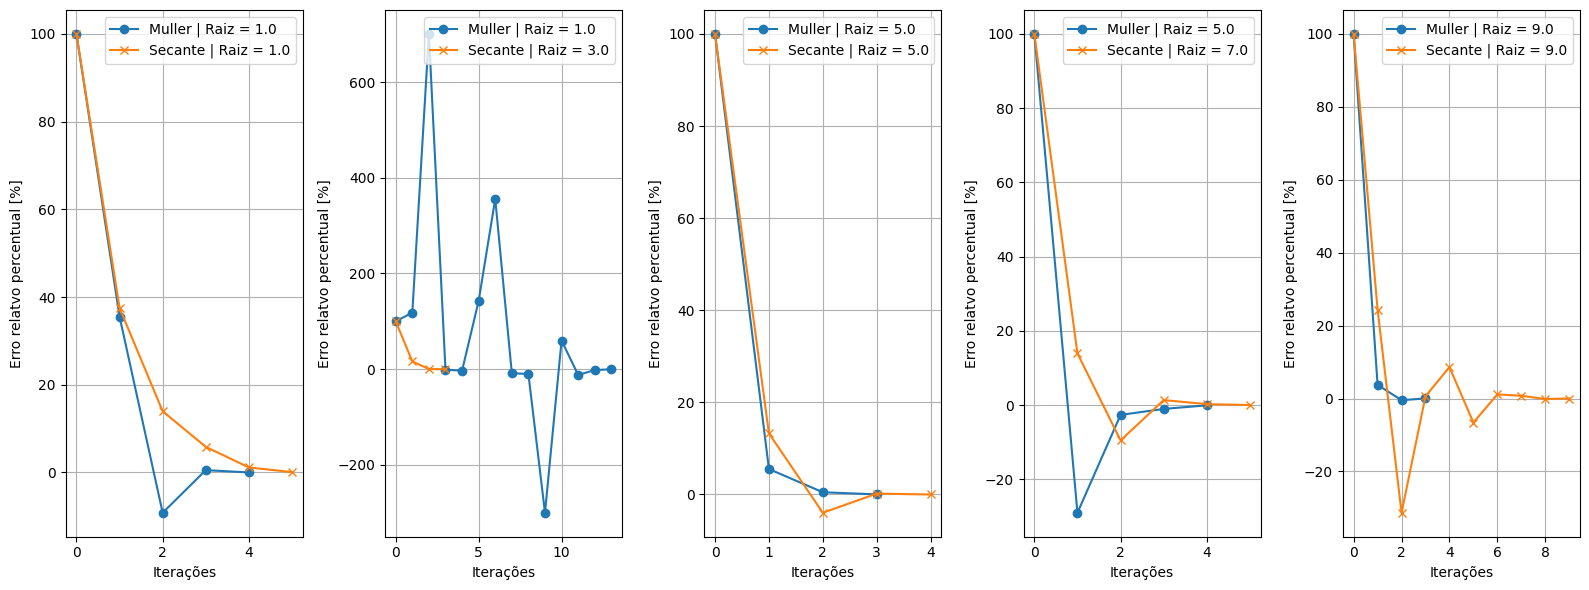

In [ ]:
# Dicionário com novos conjuntos de aproximações iniciais para outras regiões do polinômio
# Cada chave representa uma raiz estimada e os valores são as três aproximações iniciais
initial_values = {
    'raiz_1': [0.3, 0.5, 0.7],
    'raiz_2': [2.3, 2.5, 2.7],
    'raiz_3': [4.3, 4.5, 4.7],
    'raiz_4': [6.3, 6.5, 6.7],
    'raiz_5': [8.3, 8.5, 8.7],
}

# Definição da tolerância para o critério de parada dos métodos
tol = 0.1

i = 1  # Índice da subplot atual

# Criação de uma figura com tamanho apropriado para os gráficos lado a lado
plt.figure(figsize=(16,6))

# Loop para aplicar os métodos em cada conjunto de aproximações iniciais
for key, value in initial_values.items():
    
    # Execução do método de Müller com três aproximações iniciais
    xr_muller, Err_rel_muller = muller_method(poly, value[0], value[1], value[2], tol)
    
    # Execução do método da Secante com as duas primeiras aproximações
    xr_sec, Err_rel_sec = sec_method(poly, value[0], value[1], tol)
    
    # Criação da subplot correspondente à raiz atual
    plt.subplot(1, 5, i)
    
    # Gráfico da evolução do erro relativo do método de Müller
    plt.plot(range(len(Err_rel_muller)), Err_rel_muller, marker='o',
             label=f'Muller | Raiz = {xr_muller:.2f}')
    
    # Gráfico da evolução do erro relativo do método da Secante
    plt.plot(range(len(Err_rel_sec)), Err_rel_sec, marker='x',
             label=f'Secante | Raiz = {xr_sec:.2f}')
    
    # Configurações visuais do gráfico
    plt.legend(loc='upper right')           # Posição da legenda
    plt.grid()                              # Exibe a grade
    plt.xlabel('Iterações')                 # Rótulo do eixo x
    plt.ylabel('Erro relativo percentual [%]')  # Rótulo do eixo y
    
    i += 1  # Avança para a próxima subplot

# Ajusta automaticamente os subplots para evitar sobreposição
plt.tight_layout()

# Exibe todos os gráficos gerados
plt.show()

# Conclusão

No primeiro conjunto de chutes inicias, o método da Secante encontrou as primeiras 3 raizes, mas para as raizes 7 e 9 o algorirtmo encontrou 1 como raiz. O métododo de Muller encontrou também três raizes, que foram 1, 5 e 9, tendo dificuldade de encontrar as raízes 3 e 7. Mas, de forma geral, o método de Muller precisou de menos iterações para encontrar as raízes quando comparado com o método da Secante, para os casos em que a mesma raíz foi encontradad pelos dois métodos.

Já no segundo conunto de chutes iniciais, os valores estavam um pouco mais próximos das raíes, o método da Secante encontrou todas as raízes do polinômio proposto e o método de Muller teve a mesma dificuldade que no cenário anterior. Porém, para os casos em que o método de Muller encontrou as mesmas raízes que o método da Secante, o fez, também, em menos iterações.